In [281]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [282]:
coffe = pd.read_csv(r'C:\Users\Lucas\Desktop\projeto 1\simplified_coffee.csv', sep = ',')
coffe.head()
coffe.shape

(1267, 9)

In [283]:
#We can see that the rows where the roast is United States are wrong, so we will drop them.
import numpy as np
coffe[coffe['roast']=='United States'] = np.nan

In [284]:
coffe.isnull().sum()

name           21
roaster        21
roast          33
loc_country    21
origin_1       21
100g_USD       21
rating         21
review_date    21
desc_1         21
dtype: int64

In [285]:
coffe.dropna(axis = 0, inplace = True)
coffe.shape

(1234, 9)

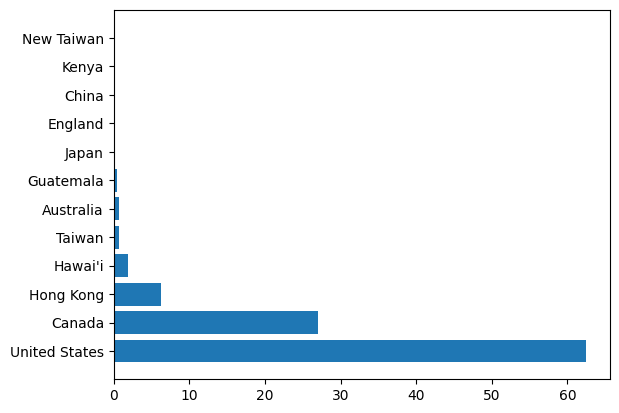

In [286]:
coffe_roaster = coffe['loc_country'].value_counts(normalize=True)*100
import matplotlib.pyplot as plt
%matplotlib inline
plt.barh(coffe['loc_country'].unique(), coffe_roaster)
plt.show()
#We can see that the vast majority of the coffee in this dataset is roasted in the USA

In [287]:
coffe_origin = coffe['origin_1'].value_counts(normalize=True)*100
coffe_origin
#And the majority of the coffe is from Ethiopia

Ethiopia                            35.899514
Colombia                            12.236629
Kenya                               11.588331
Hawai'I                              9.157212
Guatemala                            7.779579
Panama                               5.267423
Costa Rica                           3.727715
Indonesia                            2.269044
El Salvador                          1.134522
Democratic Republic Of The Congo     1.134522
Brazil                               1.053485
Peru                                 1.053485
Rwanda                               0.972447
Burundi                              0.972447
Yemen                                0.972447
Nicaragua                            0.891410
Mexico                               0.891410
Taiwan                               0.729335
Ecuador                              0.648298
Honduras                             0.486224
Nepal                                0.162075
Bolivia                           

In [288]:
coffe['review_date'].unique()

array(['November 2017', 'December 2017', 'January 2018', 'February 2018',
       'March 2018', 'April 2018', 'May 2018', 'June 2018', 'July 2018',
       'August 2018', 'September 2018', 'October 2018', 'November 2018',
       'December 2018', 'February 2019', 'January 2019', 'March 2019',
       'April 2019', 'May 2019', 'June 2019', 'July 2019', 'August 2019',
       'September 2019', 'October 2019', 'November 2019', 'December 2019',
       'January 2020', 'February 2020', 'March 2020', 'April 2020',
       'May 2020', 'June 2020', 'July 2020', 'August 2020',
       'September 2020', 'October 2020', 'November 2020', 'December 2020',
       'January 2021', 'February 2021', 'March 2021', 'April 2021',
       'May 2021', 'June 2021', 'July 2021', 'August 2021',
       'September 2021', 'October 2021', 'November 2021', 'December 2021',
       'January 2022', 'February 2022', 'March 2022', 'April 2022',
       'May 2022', 'June 2022', 'July 2022', 'August 2022',
       'September 2022', '

In [289]:
coffe['review_date'] = pd.to_datetime(coffe['review_date'])
coffe['review_date']= coffe['review_date'].dt.strftime('%Y-%m')

In [290]:
coffe

,name,roaster,roast,loc_country,origin_1,100g_USD,rating,review_date,desc_1
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.7,92,2017-11,"Crisply sweet, cocoa-toned. Lemon blossom, roasted cacao nib, date, rice candy, white peppercorn..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,2017-11,"Delicate, sweetly spice-toned. Pink peppercorn, date, myrrh, lavender, roasted cacao nib in arom..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,2017-11,"Deeply sweet, subtly pungent. Honey, pear, tangerine zest, dark chocolate, pistachio in aroma an..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,2017-11,"Delicate, richly and sweetly tart. Dried hibiscus, fine musk, almond, sandalwood, raspberry in a..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,2017-11,"High-toned, floral. Dried apricot, magnolia, almond butter, maple syrup, cherry brandy in aroma ..."
...,...,...,...,...,...,...,...,...,...
1262,Finca Patzibir,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.7,92,2022-11,"Crisply sweet, nut-toned. Almond brittle, pie cherry, magnolia, baking chocolate, mesquite in ar..."
1263,Proyecto Aurora,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,2022-11,"Chocolaty, floral-framed. Cocoa nib, honeysuckle, date, almond butter, cedar in aroma and cup. S..."
1264,Finca El Potrero,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,2022-11,"High-toned, enticingly sweet. Black cherry, narcissus, cashew butter, lemon verbena, juniper bar..."
1265,Chacayá Santiago Atitlán,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.7,93,2022-11,"Vibrantly sweet, subtly nuanced. Apricot, dark chocolate, hazelnut, hyacinth, honey in aroma an..."


In [291]:
coffe['100g_USD'] = coffe['100g_USD'].astype('float')
coffe['rating'] = coffe['rating'].astype('int')

In [292]:
coffe.dtypes

name            object
roaster         object
roast           object
loc_country     object
origin_1        object
100g_USD       float64
rating           int32
review_date     object
desc_1          object
dtype: object

In [293]:
coffe.rename({'loc_country':'roaster_loc', 'roast':'roast_type', 'origin_1':'bean_origin', '100g_USD':'price', 'desc_1':'description'}, axis = 1, inplace = True)

In [294]:
coffe

,name,roaster,roast_type,roaster_loc,bean_origin,price,rating,review_date,description
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,2017-11,"Crisply sweet, cocoa-toned. Lemon blossom, roasted cacao nib, date, rice candy, white peppercorn..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,2017-11,"Delicate, sweetly spice-toned. Pink peppercorn, date, myrrh, lavender, roasted cacao nib in arom..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,2017-11,"Deeply sweet, subtly pungent. Honey, pear, tangerine zest, dark chocolate, pistachio in aroma an..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,2017-11,"Delicate, richly and sweetly tart. Dried hibiscus, fine musk, almond, sandalwood, raspberry in a..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,2017-11,"High-toned, floral. Dried apricot, magnolia, almond butter, maple syrup, cherry brandy in aroma ..."
...,...,...,...,...,...,...,...,...,...
1262,Finca Patzibir,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,92,2022-11,"Crisply sweet, nut-toned. Almond brittle, pie cherry, magnolia, baking chocolate, mesquite in ar..."
1263,Proyecto Aurora,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,2022-11,"Chocolaty, floral-framed. Cocoa nib, honeysuckle, date, almond butter, cedar in aroma and cup. S..."
1264,Finca El Potrero,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,2022-11,"High-toned, enticingly sweet. Black cherry, narcissus, cashew butter, lemon verbena, juniper bar..."
1265,Chacayá Santiago Atitlán,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,93,2022-11,"Vibrantly sweet, subtly nuanced. Apricot, dark chocolate, hazelnut, hyacinth, honey in aroma an..."


In [295]:
coffe['roast_type'] = coffe['roast_type'].apply(str.lower)
coffe['bean_origin'] = coffe['bean_origin'].apply(str.lower)
coffe['description'] = coffe['description'].apply(str.lower)
coffe['roaster_loc'] = coffe['roaster_loc'].apply(str.lower)

In [296]:
np.sort(coffe['rating'].unique())

array([84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])

In [297]:
#classifying the ratings by categories. 
ratings = []
for row in coffe['rating']:
    if row <= 89:
        ratings.append('D')
    elif row >= 90 and row <= 93:
        ratings.append('C')
    elif row >= 94 and row <= 97:
        ratings.append('B')
    else:
        ratings.append('A')
    

coffe['class_rating'] = ratings

In [298]:
coffe

,name,roaster,roast_type,roaster_loc,bean_origin,price,rating,review_date,description,class_rating
0,Ethiopia Shakiso Mormora,Revel Coffee,medium-light,united states,ethiopia,4.70,92,2017-11,"crisply sweet, cocoa-toned. lemon blossom, roasted cacao nib, date, rice candy, white peppercorn...",C
1,Ethiopia Suke Quto,Roast House,medium-light,united states,ethiopia,4.19,92,2017-11,"delicate, sweetly spice-toned. pink peppercorn, date, myrrh, lavender, roasted cacao nib in arom...",C
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,medium,united states,ethiopia,4.85,94,2017-11,"deeply sweet, subtly pungent. honey, pear, tangerine zest, dark chocolate, pistachio in aroma an...",B
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,light,united states,ethiopia,5.14,93,2017-11,"delicate, richly and sweetly tart. dried hibiscus, fine musk, almond, sandalwood, raspberry in a...",C
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,medium-light,united states,ethiopia,3.97,93,2017-11,"high-toned, floral. dried apricot, magnolia, almond butter, maple syrup, cherry brandy in aroma ...",C
...,...,...,...,...,...,...,...,...,...,...
1262,Finca Patzibir,El Gran Cafe,medium-light,guatemala,guatemala,4.70,92,2022-11,"crisply sweet, nut-toned. almond brittle, pie cherry, magnolia, baking chocolate, mesquite in ar...",C
1263,Proyecto Aurora,El Gran Cafe,medium-light,guatemala,guatemala,2.94,93,2022-11,"chocolaty, floral-framed. cocoa nib, honeysuckle, date, almond butter, cedar in aroma and cup. s...",C
1264,Finca El Potrero,El Gran Cafe,medium-light,guatemala,guatemala,2.94,93,2022-11,"high-toned, enticingly sweet. black cherry, narcissus, cashew butter, lemon verbena, juniper bar...",C
1265,Chacayá Santiago Atitlán,El Gran Cafe,medium-light,guatemala,guatemala,4.70,93,2022-11,"vibrantly sweet, subtly nuanced. apricot, dark chocolate, hazelnut, hyacinth, honey in aroma an...",C


In [299]:
coffe['roast_type'].value_counts(normalize = True)
#I decided to unify the light, medium, medium-dark and dark roast types. Since they represent each one a small amount of the data, togheter they are approximately 26%.

medium-light    0.732577
light           0.160454
medium          0.092382
medium-dark     0.012156
dark            0.002431
Name: roast_type, dtype: float64

In [300]:
roasted = (coffe['roast_type'] == 'light') | (coffe['roast_type'] == 'medium') | (coffe['roast_type'] == 'medium-dark') | (coffe['roast_type'] == 'dark') 
coffe.loc[roasted, 'roast_type'] = 'Other'

In [301]:
pd.options.display.max_colwidth = 100
descriptions = pd.DataFrame()
descriptions = coffe['description']

In [302]:
new_string = []
import re
for string in descriptions:
    correct_string = re.sub(r'[^\w\s]', '', string)
    new_string.append(correct_string)

In [303]:
new_string = pd.Series(new_string, name = 'Descriptions')
new_string = new_string.str.strip()

In [304]:
splitted = new_string.map(lambda x: x.split())

In [305]:
splitted

0       [crisply, sweet, cocoatoned, lemon, blossom, roasted, cacao, nib, date, rice, candy, white, pepp...
1       [delicate, sweetly, spicetoned, pink, peppercorn, date, myrrh, lavender, roasted, cacao, nib, in...
2       [deeply, sweet, subtly, pungent, honey, pear, tangerine, zest, dark, chocolate, pistachio, in, a...
3       [delicate, richly, and, sweetly, tart, dried, hibiscus, fine, musk, almond, sandalwood, raspberr...
4       [hightoned, floral, dried, apricot, magnolia, almond, butter, maple, syrup, cherry, brandy, in, ...
                                                       ...                                                 
1229    [crisply, sweet, nuttoned, almond, brittle, pie, cherry, magnolia, baking, chocolate, mesquite, ...
1230    [chocolaty, floralframed, cocoa, nib, honeysuckle, date, almond, butter, cedar, in, aroma, and, ...
1231    [hightoned, enticingly, sweet, black, cherry, narcissus, cashew, butter, lemon, verbena, juniper...
1232    [vibrantly, sweet, s

In [306]:
words = {}
for lista in splitted:
    for word in lista:
        if word in words:
            words[word] +=1
        else:
            words[word] = 1

In [307]:
sorted_dict = sorted(words.items(), key=lambda x: x[1], reverse = True)
sorted_dict


[('and', 2646),
 ('in', 1886),
 ('with', 1619),
 ('cup', 1281),
 ('aroma', 1239),
 ('finish', 1224),
 ('mouthfeel', 1203),
 ('the', 1149),
 ('structure', 1051),
 ('acidity', 1020),
 ('of', 903),
 ('chocolate', 854),
 ('sweet', 772),
 ('notes', 689),
 ('richly', 534),
 ('cocoa', 533),
 ('sweetly', 465),
 ('nib', 444),
 ('cedar', 427),
 ('dark', 424),
 ('zest', 384),
 ('syrupy', 368),
 ('juicy', 346),
 ('almond', 333),
 ('tart', 327),
 ('long', 324),
 ('a', 315),
 ('sweettart', 313),
 ('crisp', 312),
 ('bright', 297),
 ('full', 290),
 ('deeply', 288),
 ('to', 279),
 ('balanced', 260),
 ('flowers', 254),
 ('resonant', 247),
 ('crisply', 244),
 ('consolidates', 234),
 ('lemon', 227),
 ('chocolaty', 224),
 ('sweetsavory', 214),
 ('satiny', 210),
 ('sandalwood', 209),
 ('dried', 204),
 ('syrup', 198),
 ('plush', 197),
 ('apricot', 187),
 ('oak', 186),
 ('baking', 185),
 ('around', 174),
 ('by', 174),
 ('hazelnut', 174),
 ('undertones', 172),
 ('floral', 171),
 ('fruittoned', 169),
 ('highton

In [308]:
wanted_words = ['acidity', 'chocolate', 'sweet', 'cocoa', 'caramel', 'dark', 'cedar', 'juicy', 'almond', 'marjoram', 'raspberry', 'mango', 'creamy', 'lemon', 'butter', 'jasmine', 'peach', 'cherry', 'honey', 'tangerine', 'grapefruit', 'orange', 'maple', 'blossom']

In [309]:
def texts_to_binary_df(texts, words):
    words_binary = {word: [] for word in words}
    for text in texts:
        for word in words:
            words_binary[word].append(1 if word in text else 0)
    return pd.DataFrame(words_binary)

In [310]:
words_binary = texts_to_binary_df(splitted, wanted_words)

In [311]:
coffe_new = pd.concat([coffe.reset_index(), words_binary.reset_index()], axis = 1)

In [312]:
coffe_new = coffe_new.drop(['index', 'description'], axis = 1)

In [313]:
coffe_new

,name,roaster,roast_type,roaster_loc,bean_origin,price,rating,review_date,class_rating,acidity,...,butter,jasmine,peach,cherry,honey,tangerine,grapefruit,orange,maple,blossom
0,Ethiopia Shakiso Mormora,Revel Coffee,medium-light,united states,ethiopia,4.70,92,2017-11,C,0,...,0,0,0,0,0,0,0,0,0,1
1,Ethiopia Suke Quto,Roast House,medium-light,united states,ethiopia,4.19,92,2017-11,C,1,...,0,0,0,0,0,0,0,0,0,0
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Other,united states,ethiopia,4.85,94,2017-11,B,0,...,0,0,0,0,1,1,0,0,0,0
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Other,united states,ethiopia,5.14,93,2017-11,C,1,...,0,0,0,0,0,0,0,0,0,0
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,medium-light,united states,ethiopia,3.97,93,2017-11,C,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Finca Patzibir,El Gran Cafe,medium-light,guatemala,guatemala,4.70,92,2022-11,C,1,...,0,0,0,1,0,0,0,0,0,0
1230,Proyecto Aurora,El Gran Cafe,medium-light,guatemala,guatemala,2.94,93,2022-11,C,1,...,1,0,0,0,0,0,0,0,0,0
1231,Finca El Potrero,El Gran Cafe,medium-light,guatemala,guatemala,2.94,93,2022-11,C,1,...,1,0,0,1,0,0,0,0,0,0
1232,Chacayá Santiago Atitlán,El Gran Cafe,medium-light,guatemala,guatemala,4.70,93,2022-11,C,1,...,0,0,0,0,1,0,0,0,0,0


In [314]:
#Transfoming the roaster_type and class rating variables into dummy variables.
coffe_new =  pd.get_dummies(coffe_new, columns=['roast_type', 'class_rating'])
coffe_new

,name,roaster,roaster_loc,bean_origin,price,rating,review_date,acidity,chocolate,sweet,...,tangerine,grapefruit,orange,maple,blossom,roast_type_Other,roast_type_medium-light,class_rating_B,class_rating_C,class_rating_D
0,Ethiopia Shakiso Mormora,Revel Coffee,united states,ethiopia,4.70,92,2017-11,0,0,1,...,0,0,0,0,1,0,1,0,1,0
1,Ethiopia Suke Quto,Roast House,united states,ethiopia,4.19,92,2017-11,1,0,1,...,0,0,0,0,0,0,1,0,1,0
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,united states,ethiopia,4.85,94,2017-11,0,1,1,...,1,0,0,0,0,1,0,1,0,0
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,united states,ethiopia,5.14,93,2017-11,1,0,1,...,0,0,0,0,0,1,0,0,1,0
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,united states,ethiopia,3.97,93,2017-11,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Finca Patzibir,El Gran Cafe,guatemala,guatemala,4.70,92,2022-11,1,1,1,...,0,0,0,0,0,0,1,0,1,0
1230,Proyecto Aurora,El Gran Cafe,guatemala,guatemala,2.94,93,2022-11,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1231,Finca El Potrero,El Gran Cafe,guatemala,guatemala,2.94,93,2022-11,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1232,Chacayá Santiago Atitlán,El Gran Cafe,guatemala,guatemala,4.70,93,2022-11,1,1,1,...,0,0,0,0,0,0,1,0,1,0


In [315]:
x = coffe_new.drop(['name', 'roaster', 'roaster_loc', 'bean_origin', 'price', 'review_date', 'rating'], axis = 1)
y = coffe_new['price']

In [316]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [317]:
lr_predictions = lr.predict(x_test)
lr_mse =  mean_squared_error(y_test, predictions)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

12.501383382458215

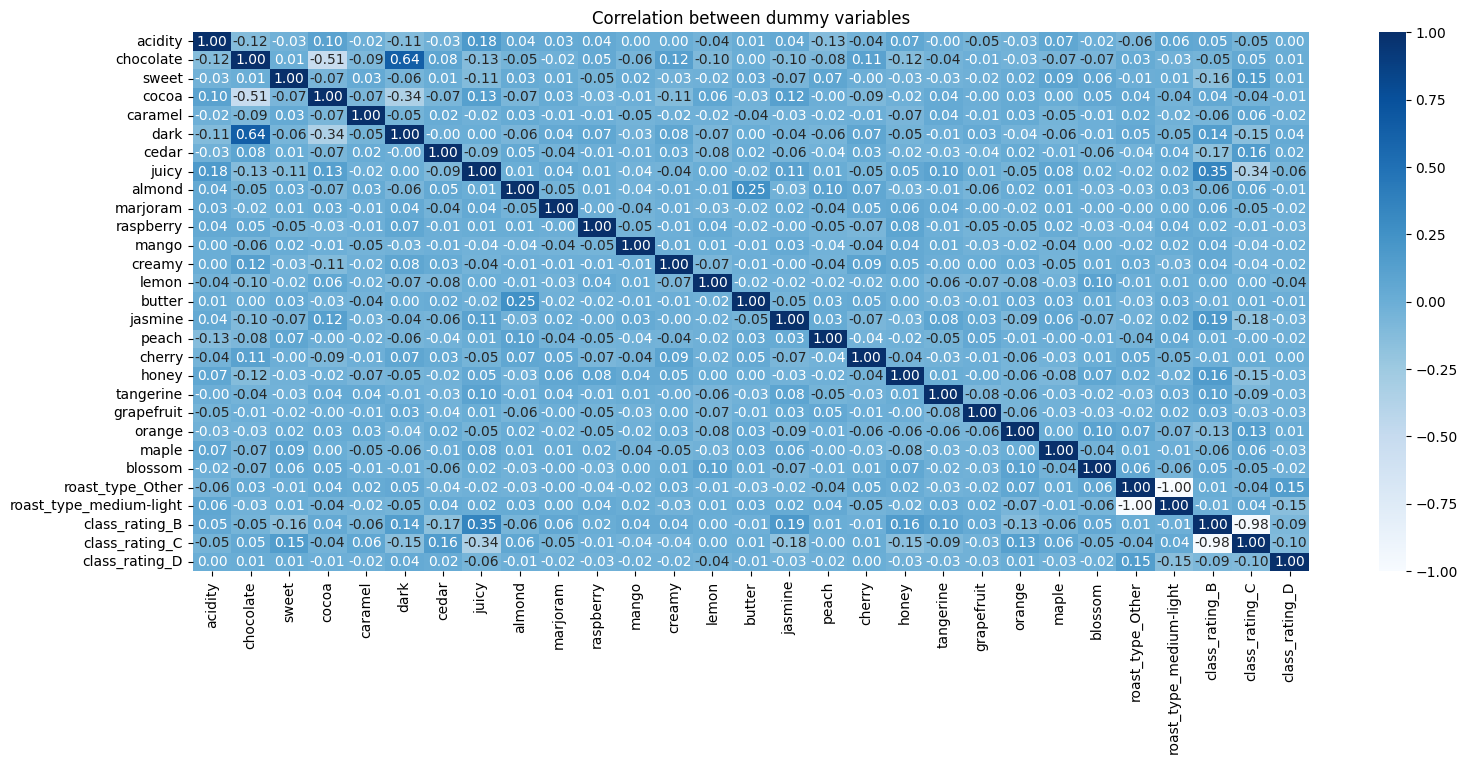

In [318]:
#Checking the colinearity of the dummy variables.
import seaborn as sns
plt.figure(figsize=(18, 7))
sns.heatmap(coffe_new.iloc[:, 7:].corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlation between dummy variables')
plt.show()
#We can see that the variables are not correlated at all.

In [333]:
#We will use K-fold cross-validation to check the distribution of test errors and reduce the number influence of outliers on these estimates.
from sklearn.model_selection import cross_val_score
fold_lr_model = LinearRegression()
k2 = cross_val_score(fold_lr_model, x, y, cv=2, scoring="neg_mean_squared_error")
k10 = cross_val_score(fold_lr_model, x, y, cv=10, scoring="neg_mean_squared_error")
k100 = cross_val_score(fold_lr_model, x, y, cv=100, scoring="neg_mean_squared_error")
avgs = [np.mean(k2), np.mean(k10), np.mean(k100)]
stds = [np.std(k2), np.std(k10), np.std(k100)]
print('AVGs\n{} \n\nSTDs\n{}'.format(avgs, stds))

# When increasing the number of folds in cross-validation, the average error typically decreases, but the standard deviation increases. This is because with more folds, 
# we are using more data to train the model, which results in a more accurate estimate of the model's performance. 
# However, as the standard deviation increases, this also means that the model's performance becomes more variable and less predictable. 
# In other words, while the average error may decrease, the range of possible errors also increases, making it harder to determine the model's true performance. 
# Thus, choosing the right number of folds in cross-validation is a trade-off between accuracy and stability, and finding the right balance depends on the specific problem and data set at hand.

AVGs
[-144.72530702716642, -140.64745824747416, -139.66985037626642] 

STDs
[36.7673047454606, 94.45359717408292, 311.21420530347433]
